ISLR Chapter 2 Lab and Assignment
----
- Author: Carson Hanel
- Class : Data Mining in Social Networks
- Prof  : Eduardo Nakamura

Some basic commands
----
This is all very introductory R, but it's necessary to do it this way. This is the first R programming material to appear on my GitHub repository, so I'd like it to be very elementary (and honestly, mostly from the textbook) as a living reference/blog for my future endeavors in both data science and statistical learning

1.1 List Comprehension:
----

In [18]:
# Comparison of assignment operators; They'll both do.
x <- c(1,6,2)
y = c(1,4,3)
print(x)
print(y)

[1] 1 6 2
[1] 1 4 3


In [19]:
# Some insightful commands in R
sprintf("Length of x: %d",length(x))
sprintf("Length of y: %d",length(y))

# Neat to note, when given an iterative sprintf, outputs message for all elements.
# This would be useful for outputting matrices/elements after some operation.
sprintf("Element-wise sum: %d",x+y)
print(x+y)

[1] "Length of x: 3"

[1] "Length of y: 3"

[1] "Element-wise sum: 2"  "Element-wise sum: 10" "Element-wise sum: 5"

[1]  2 10  5


In [20]:
# Listing all current variables (useful in R CMD prompt)
print("Printing all elements:")
ls()

# Removing x and y from the variable table
print("Deleting x, y.")
rm(x, y)

# Re-listing variables after deletion
print("Second call to ls()")
ls()
print("Notice, no variables printed, and a white space above.")

# Before the next example, I'll add some variables.
x = c(8,6,7,5,3,0,9)
y = c("This", "is", "R", "programming")
print("Printing new elements:")
ls()

# Deleting all variables at once:
rm(list=ls())
print("After the rm(list=ls()) call:")
ls()

[1] "Printing all elements:"


[1] "auto" "Auto" "x"    "y"

[1] "Deleting x, y."
[1] "Second call to ls()"


[1] "auto" "Auto"

[1] "Notice, no variables printed, and a white space above."
[1] "Printing new elements:"


[1] "auto" "Auto" "x"    "y"

[1] "After the rm(list=ls()) call:"


character(0)

1.2 Matrix Comprehension and Experimentation:
----
In order to learn more about matrix() and how it can be utilized, first we'll do this:

In [21]:
# Gaining R-Insight on library functions
# Running this command will open up a browser box with Matrix information;
# This is unable to be shown in the Jupyter Notebook.
?matrix

Initially, I'd like to create a basic matrix holding basic data:

In [22]:
# Now, we'll create a 2x2 matrix with data:
x = matrix(data=c(1,2,3,4), nrow = 2, ncol = 2)
x

1,3
2,4


Notice that the matrix was filled in column-wise. Sometimes, that'll be absolutely perfect, for example, a scalar vector with sized chunks that represent the data of employees for a company; perhaps a column is representative of the certain employee's metrics, and filling in the matrix column-wise would be appropriately lining up the employee data.

Other times, we'll want to fill in a matrix by the row. In order to do this, you utilize the extra argument "byrow = TRUE".

In [23]:
# In order to fill a matrix in row-wise:
x = matrix(data=c(1,2,3,4), nrow = 2, ncol = 2, byrow = TRUE)
x

1,2
3,4


Additionally, commands can be applied, or mapped, to entire matrices or instances of data like so:

In [24]:
# Applying functions to all elements in x and storing in new variables
root   = sqrt(x)
square = x^2

print("Root of x:")
print(root)

print("Square of x:")
print(square)

print("Sqare of root:")
print(root^2)


[1] "Root of x:"
         [,1]     [,2]
[1,] 1.000000 1.414214
[2,] 1.732051 2.000000
[1] "Square of x:"
     [,1] [,2]
[1,]    1    4
[2,]    9   16
[1] "Sqare of root:"
     [,1] [,2]
[1,]    1    2
[2,]    3    4


Sometimes, you'll want to generate a matrix of random normalized values centered around some $\mu$ with some $\sigma$.
This has significant value in the field of statistics and allows the user flexibility in generating statistical simulations.

In order to do this, you can use rnorm().

To expand, cor(x,y) gives the pointwise correlation between two variables and is calculated like so:

In [25]:
# Create a list of 50 random normal values
x = rnorm(50)
# Create a second list with mean 50 and a low standard deviation
y = x + rnorm(50, mean=50, sd=.1)

# Calculate the correlation between the two
cor(x,y)

[1] 0.9966594

In randomized experiments, sometimes you'd like your results to be reproducible.

In order to facilitate this, utilize a seed:

In [26]:
# Set a random seed that'll be utilize to calculate random values
set.seed(1337)
rnorm(50)

[1]  0.19249191 -1.44670181 -0.32318053  1.62229612 -0.68902412  2.04212222
 [7]  0.94377911  2.08192688  1.91711728 -0.41481224  1.03285350 -1.67856959
[13]  0.15754969  1.48913612 -0.07578956  1.27178094  0.64167341  0.80076125
[19]  1.86265923 -0.54535603  0.61927781  0.12264043 -0.79098417 -0.49977167
[25] -1.63515201  1.78456732  0.29887827  0.75250489 -1.07460214  0.06427374
[31]  1.26264948  1.09994930 -1.12355513  3.44607885 -0.71972217 -0.32685410
[37] -0.52977397  0.52415274 -1.07960965 -0.05511102  2.19868418 -1.77390933
[43]  0.06503223  0.65497038 -0.71286911  1.02056754  0.63161472  0.44743335
[49]  0.46653706 -0.69826061

In [27]:
# To put it all together, we'll place these values into a matrix, row-wise
# For fun, I'll make a matrix of values of mean 75, standard deviation 10 which is approximately
# the normal dispersion of test grades for collegiate classes, or so it seems.
random = matrix(c(rnorm(100, mean = 75, sd=10)), nrow = 10, ncol = 10, byrow = TRUE)
random

74.63545,86.17966,67.99917,63.75952,68.86933,85.12443,51.56130,80.90263,78.19134,82.01606
61.22543,78.12646,86.20848,79.71831,86.27685,81.77723,90.10240,95.61034,68.49684,61.75762
81.59471,72.78575,65.37841,76.87460,75.12245,82.12284,67.46274,75.38190,86.78421,73.46796
73.38302,89.60262,95.09458,74.22062,88.54342,64.72816,64.58825,66.29377,83.53130,68.77240
87.15710,58.78591,74.31425,74.37017,85.75708,86.29101,79.50147,75.50586,73.75670,84.12011
77.09977,71.14971,88.71785,76.58983,72.95143,66.47908,66.90528,80.33399,75.68738,67.63219
70.30838,68.25334,67.60222,86.97227,78.77740,77.74782,65.96040,79.04833,72.60856,85.74319
71.85249,76.06700,69.57784,60.34300,73.65986,87.91200,70.52967,68.69800,69.19022,51.79841
68.54096,77.99406,70.62279,70.82061,92.06272,79.10388,87.82398,89.47005,106.03674,80.83767
72.45449,65.89447,76.13977,64.51722,77.83319,76.97095,72.47427,84.98676,73.92124,97.08739


Now that we've got a simulated dataset of student's average grades, and it's in a neat matrix format, we'll do some basic analysis using R.

In [28]:
# Some basic R commands on our simulated data
# Mean:
mean(random)

# Variance: Not entirely sure what's happening with the matrix
var(random)

# Standard Deviation:
sd(random)

# Clean Variance:
sd(random)^2

[1] 76.15622

50.499512,-29.387326,-15.164256,-3.730636,-13.341459,5.089000,-28.15812,-35.092456,1.703295,23.079241
-29.387326,85.165320,28.496858,-16.342935,2.421260,-19.148054,-32.38402,-9.342164,29.305106,-49.913893
-15.164256,28.496858,105.628851,15.866223,28.285179,-60.570668,17.02271,-1.970005,-17.702222,-41.454416
-3.730636,-16.342935,15.866223,65.954570,19.374081,-21.315408,18.99955,13.675633,-3.086999,6.998016
-13.341459,2.421260,28.285179,19.374081,59.421313,-11.890845,65.06023,15.703387,38.234070,6.007182
5.089000,-19.148054,-60.570668,-21.315408,-11.890845,61.489688,14.42172,9.311284,-15.317340,-1.648620
-28.158116,-32.384018,17.022706,18.999546,65.060230,14.421716,132.38815,58.298036,23.658519,-16.775457
-35.092456,-9.342164,-1.970005,13.675633,15.703387,9.311284,58.29804,79.529362,11.855912,29.693921
1.703295,29.305106,-17.702222,-3.086999,38.234070,-15.317340,23.65852,11.855912,124.900163,30.558796
23.079241,-49.913893,-41.454416,6.998016,6.007182,-1.648620,-16.77546,29.693921,30.558796,175.310335


[1] 9.677462

[1] 93.65327

1.3 Graphics:
----


In [29]:
# Optional R notes command:
?plot

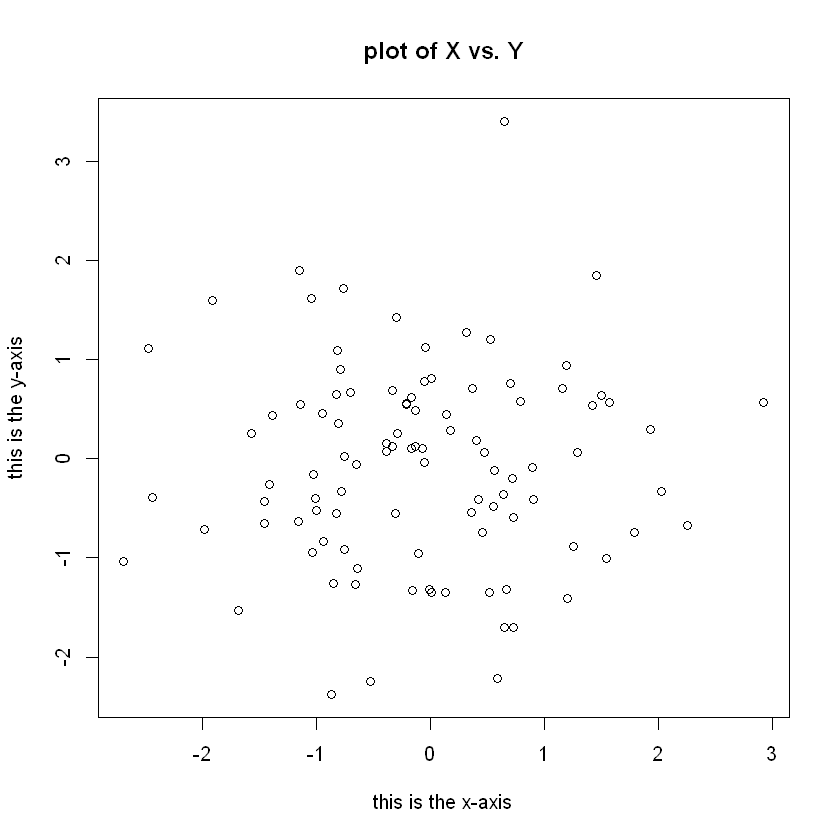

In [30]:
x = rnorm(100)
y = rnorm(100)
plot(x,y, xlab = "this is the x-axis", ylab = "this is the y-axis", main = "plot of X vs. Y")

In order to save this generated plot as a PDF, or a JPEG:

In [31]:
# Creation of a PDF
# Tell the console you want to generate a PDF:
pdf("Figure.pdf")

# Generate the required plot for the PDF:
plot(x,y,col="green")

# Tell the console you're done plotting, and to generate PDF:
dev.off()

png 
  2

Sequential list generation:

Rather than simply plot two random normalized sets against eachother, we can generate sequential lists in R:

In [32]:
# Sequential list generation command
# Essentially "Start from 1 and count to 10, increasing by 1 each time."
x = seq(1,10,1)
print(x)

# Shorthand for seq(1,10,1)
x = 1:10
print(x)

# Let R figure out the intervolic relationship
x = seq(-pi, pi, length=50)
print(x)

 [1]  1  2  3  4  5  6  7  8  9 10
 [1]  1  2  3  4  5  6  7  8  9 10
 [1] -3.14159265 -3.01336438 -2.88513611 -2.75690784 -2.62867957 -2.50045130
 [7] -2.37222302 -2.24399475 -2.11576648 -1.98753821 -1.85930994 -1.73108167
[13] -1.60285339 -1.47462512 -1.34639685 -1.21816858 -1.08994031 -0.96171204
[19] -0.83348377 -0.70525549 -0.57702722 -0.44879895 -0.32057068 -0.19234241
[25] -0.06411414  0.06411414  0.19234241  0.32057068  0.44879895  0.57702722
[31]  0.70525549  0.83348377  0.96171204  1.08994031  1.21816858  1.34639685
[37]  1.47462512  1.60285339  1.73108167  1.85930994  1.98753821  2.11576648
[43]  2.24399475  2.37222302  2.50045130  2.62867957  2.75690784  2.88513611
[49]  3.01336438  3.14159265


Next, we'll see how to create a three dimensional contour plot:

- The first dimension is a vector of X values
- The second dimension is a vector of Y values
- The third dimension is a matrix that coordinates with the (x,y) tuple's Z value

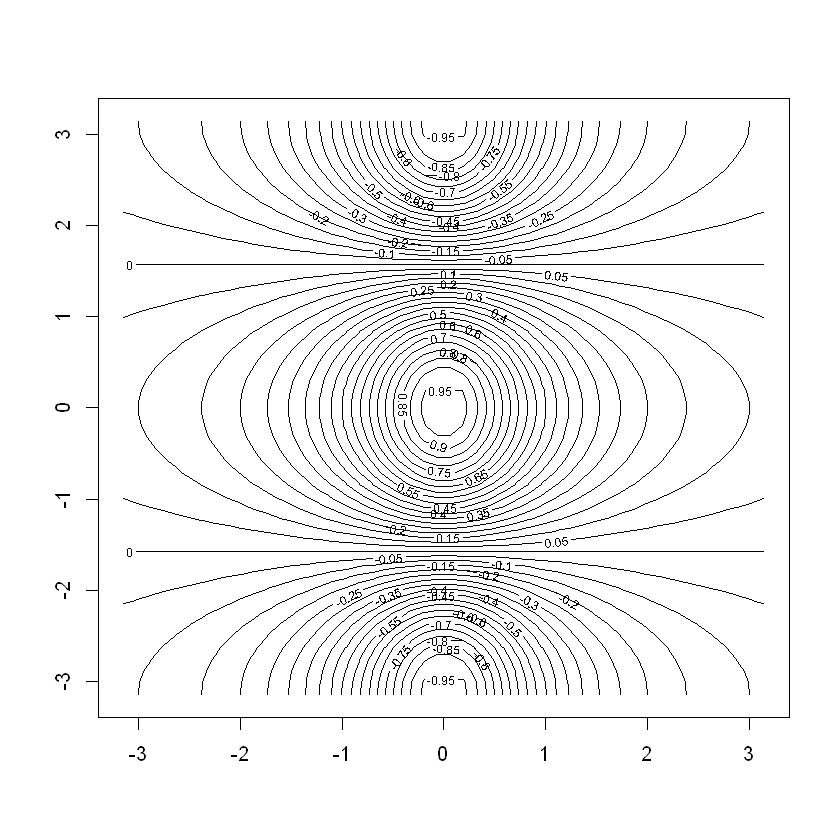

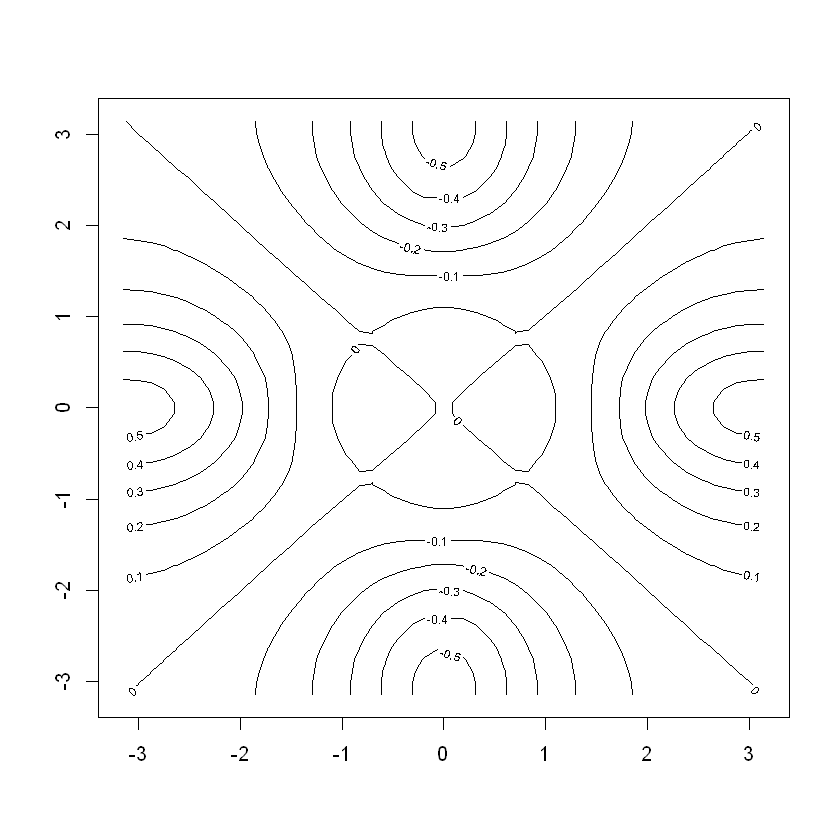

In [33]:
# Generation of variables
y = x
f = outer(x, y, function(x,y)cos(y)/(1 + x^2))

# Simple contour
contour(x, y, f)
    
# More specified contour (seen)
contour(x, y, f, nlevels=45, add=T)
    
# Contour. Not entirely sure what's going on here, but the graphs are beautiful.
# This is the second pictured graph.
fa = (f-t(f))/2
contour(x, y, fa, nlevels=15)

Now, to do this, but with a heat-map (colors) we can use image(x,y,z).

At the same time, persp(x,y,z) allows you to view the graph from different angles:

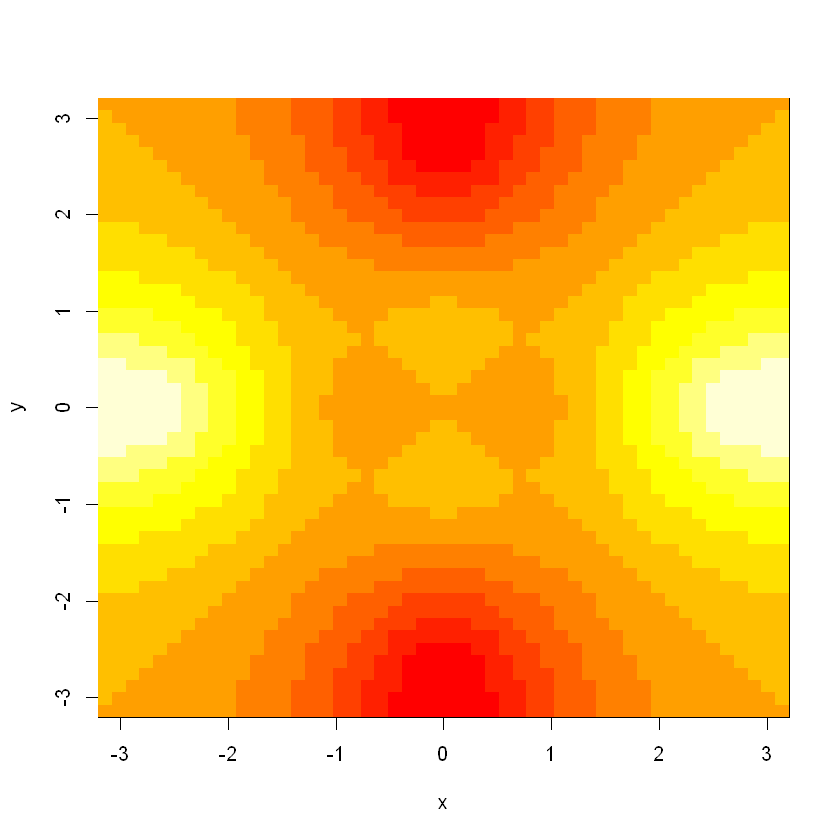

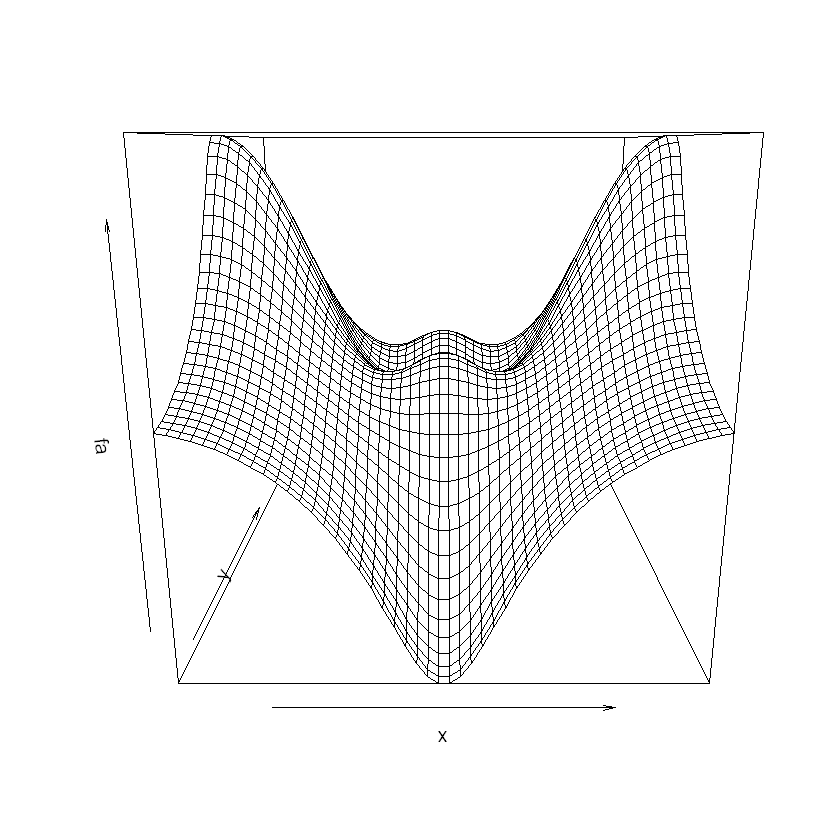

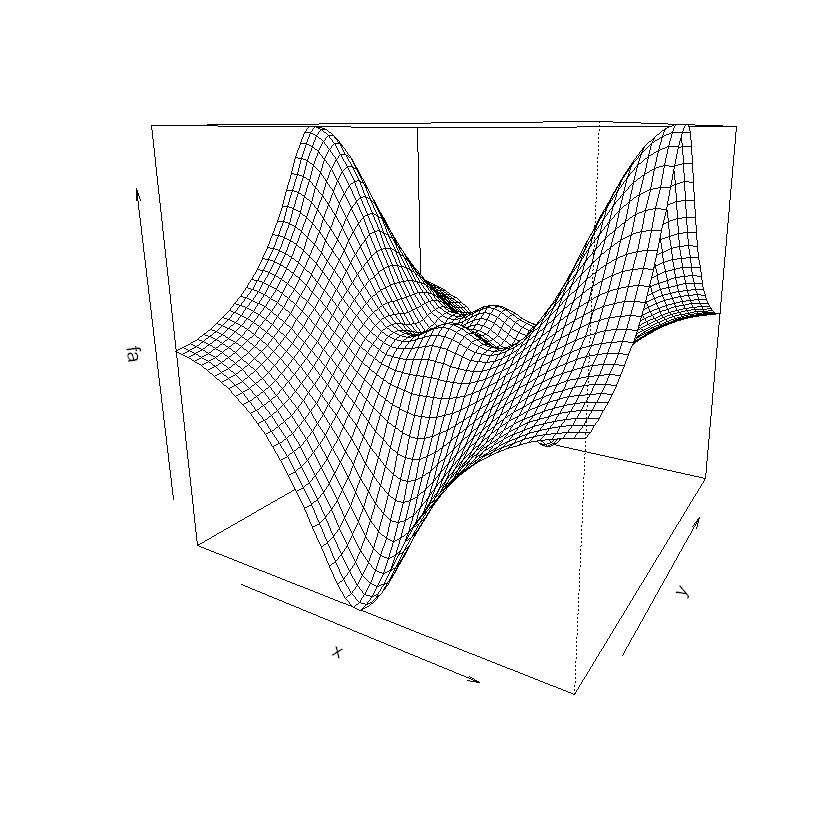

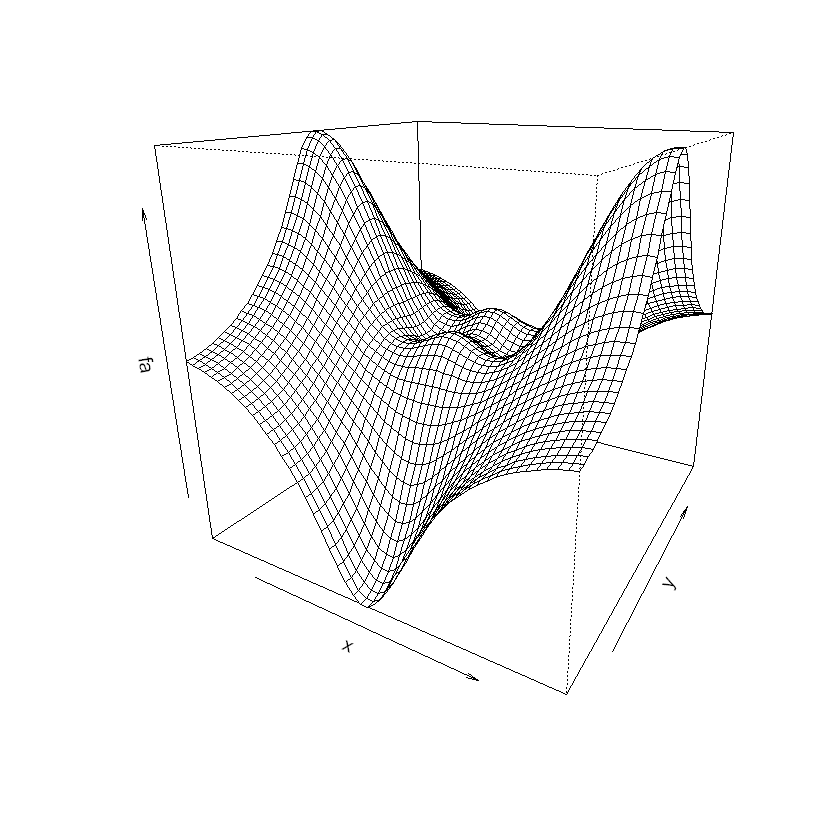

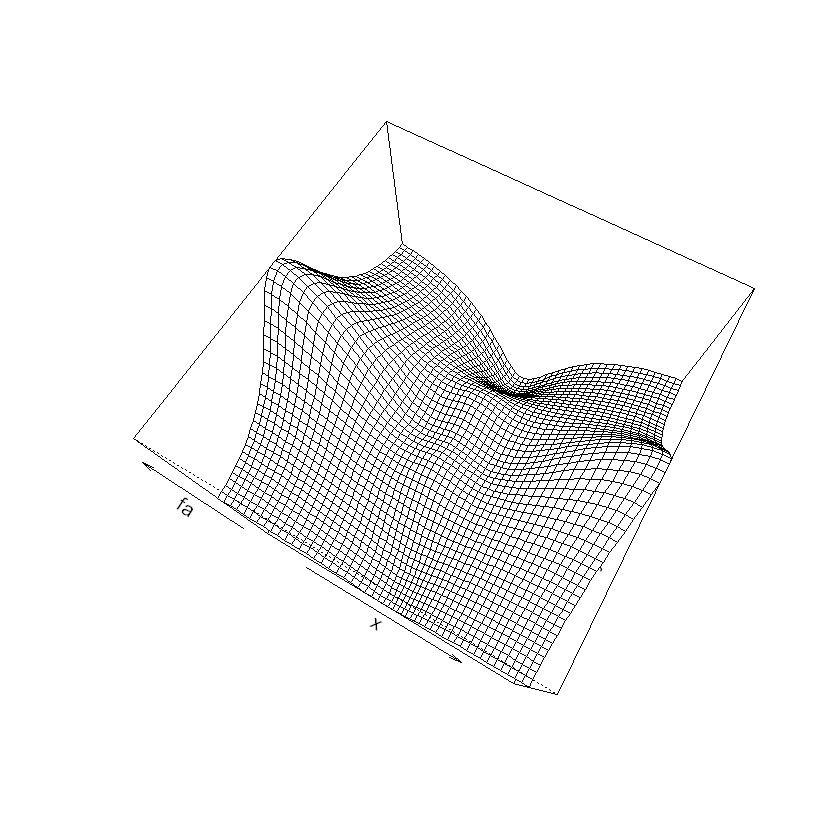

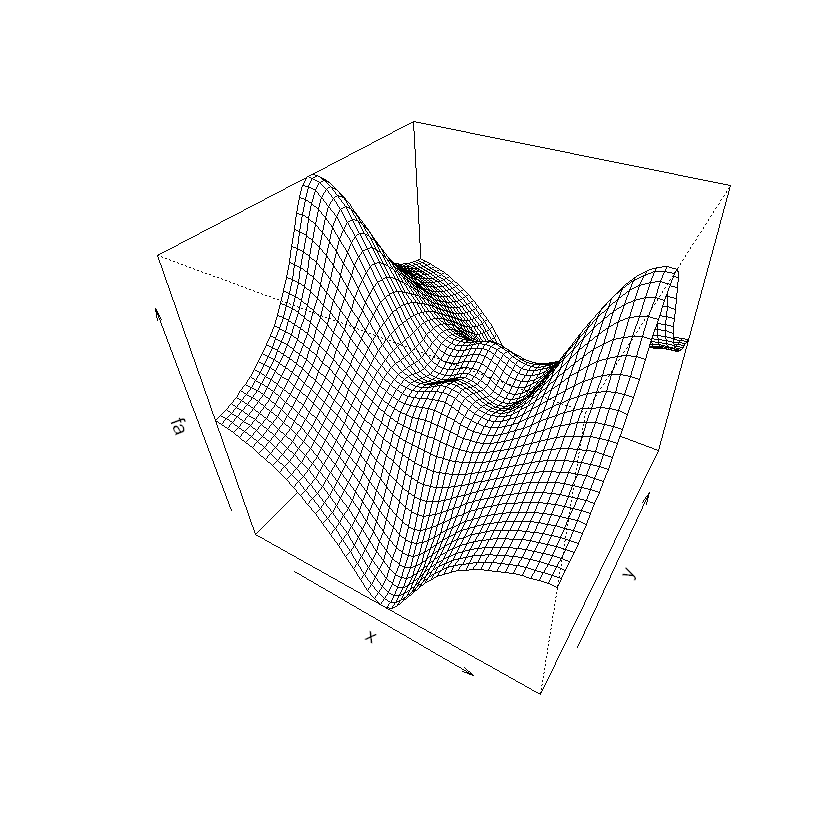

In [34]:
# Heat Map
image(x,y,fa)

# Angle-changed graph
persp(x,y,fa)
persp(x,y,fa,theta=30)

# Notice, as you increase phi, you're getting more of a "bird's eye" view of the object.
# Conversely, as you increase theta, you're rotating the graph
persp(x,y,fa,theta=30,phi=20)
persp(x,y,fa,theta=30,phi=70)
persp(x,y,fa,theta=30,phi=40)

1.4 Indexing Data in R:
----

"We often wish to examine a part of a set of data..."

In [35]:
# First, we'll generate a matrix for use in this example
A = matrix(1:16, 4, 4)
A

1,5,9,13
2,6,10,14
3,7,11,15
4,8,12,16


In [36]:
# Next, we'll print the second row, third column
A[2,3]

[1] 10

In [37]:
# We can also select multiple rows and columns at a time, by providing vectors as the indicies
# rows 1 and 3, columns 2 and 4
print("A[c(1,3),c(2,4)]")
A[c(1,3),c(2,4)]

# rows 1 through 3, columns 2 through 4
print("A[1:3,2:4]")
A[1:3,2:4]

# rows 1 through 2, all columns
print("A[1:2,]")
A[1:2,]

# all rows, columns 1 through 2
print("A[,1:2]")
A[,1:2]

# a single row as a vector
print("A[1,]")
A[1,]

# a single column as a vector
print("A[,1]")
A[,1]

# all rows except for those given in the vector, all columns
print("A[-c(1,3),]")
A[-c(1,3),]

# all rows except 1,3 all columns except 1,3,4
print("A[-c(1,3), -c(1,3,4)]")
A[-c(1,3), -c(1,3,4)]

# Dimensions of A
print("Dimensions:")
dim(A)

[1] "A[c(1,3),c(2,4)]"


5,13
7,15


[1] "A[1:3,2:4]"


5,9,13
6,10,14
7,11,15


[1] "A[1:2,]"


1,5,9,13
2,6,10,14


[1] "A[,1:2]"


1,5
2,6
3,7
4,8


[1] "A[1,]"


[1]  1  5  9 13

[1] "A[,1]"


[1] 1 2 3 4

[1] "A[-c(1,3),]"


2,6,10,14
4,8,12,16


[1] "A[-c(1,3), -c(1,3,4)]"


[1] 6 8

[1] "Dimensions:"


[1] 4 4

1.5 Loading Data in R:
----
Sometimes, rather than bootstrapping your experiments from randomized data in R isn't enough, and you'd rather actually utilize living data, i.e. from a company that you're hypothetically doing data science work for. Here, we'll go over how to read in tables of data utilizing one of the example data sets from ISLR.

In [38]:
# Optional functions
# Importing data:
?read.table()
# Exporting data:
?write.table()

In [39]:
# Loading in the data
Auto = read.table("Auto.data", header=T, na.strings="?")

# Fits the data into a CSV-like data frame. You won't be able to see this on GitHub.
# It calls the R package, and opens an R panel. Really neat, I highly recommend running it yourself.
# This notebook kernel WILL lock up until it's closed, by the way.
fix(Auto)

In [40]:
# Analyzing the dataset that was read in; Putting this in separate cell to reduce errors.
# Dimensions of the dataframe:
dim(Auto)

[1] 397   9

In [41]:
# Now, we'll remove cells with missing "N/A" values.
Auto=na.omit(Auto)

# Now that the dirty data has been removed, here are the dimensions:
dim(Auto)

[1] 392   9

In [42]:
# Checking the variable names within the dataset
names(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

1.6 Additional Graphical and Numerical Summaries
----
Utilizing the Auto dataset.

Box Plots:
----

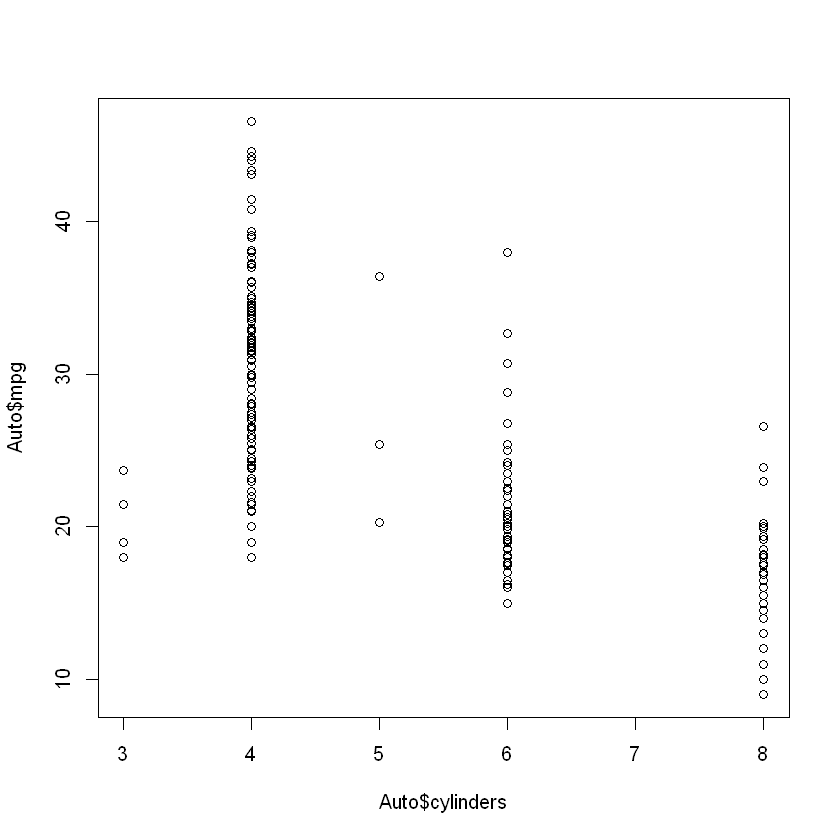

In [45]:
# To refer to a variable within a table, we must use <Table_Name>$<Variable_Name>
plot(Auto$cylinders, Auto$mpg)

# Alternatively, we could utilize attach() to attach(Auto), allowing you to call:
# plot(cylinders, mpg)

Notice how cylinders is a numeric variable, but because the nature of engines, has a much more finite value (i.e. 4, 6, 8) than the miles per gallon, which is a random normal variable. We can consider cylinders, instead of a quantitative factor, as a qualitative factor.

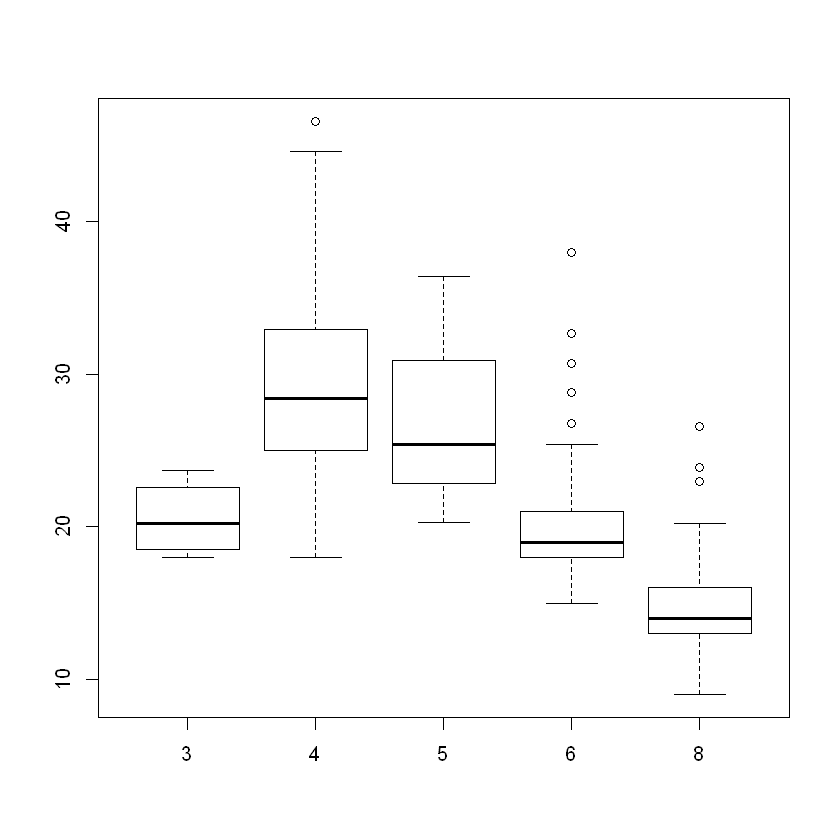

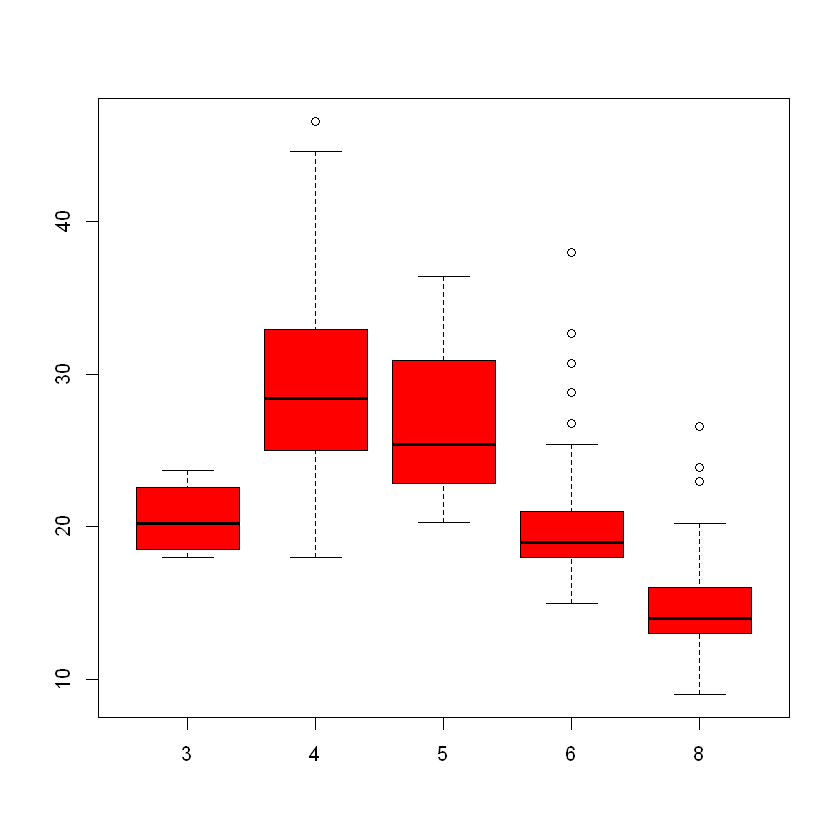

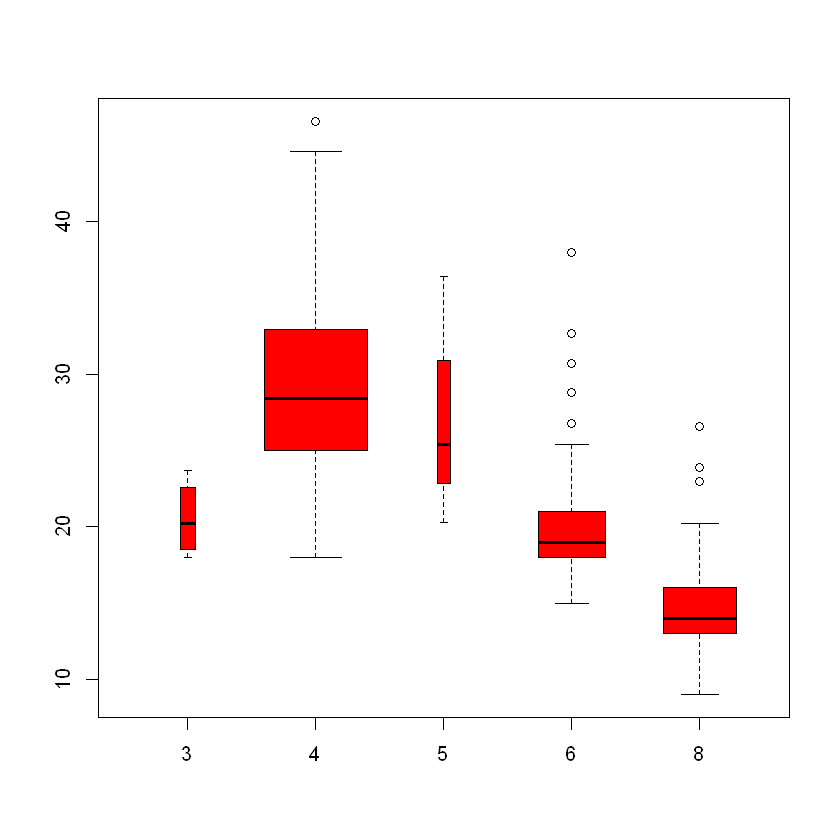

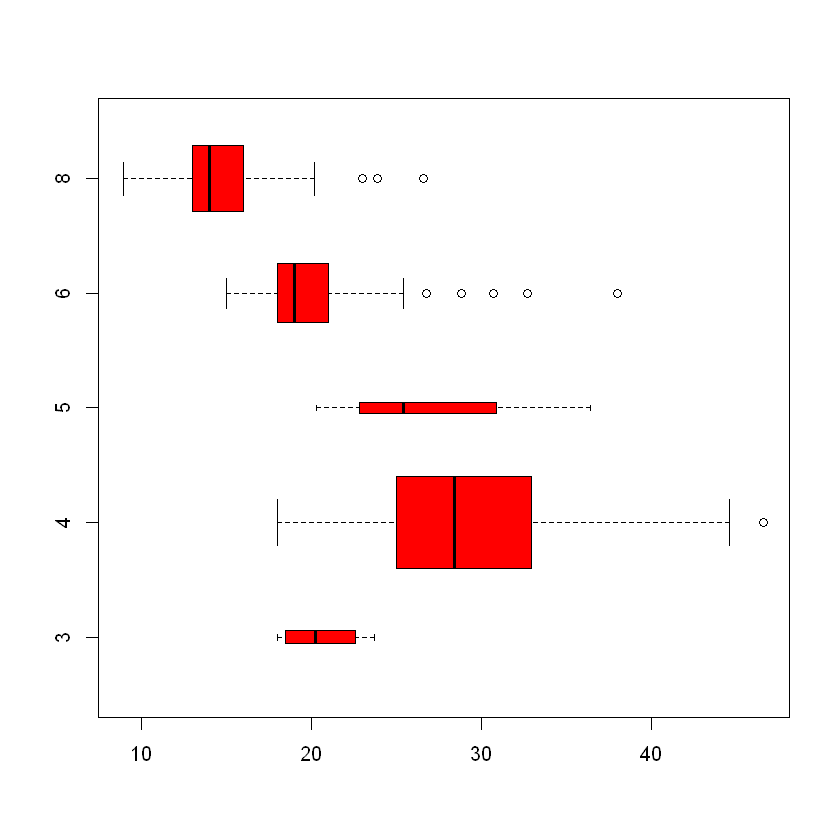

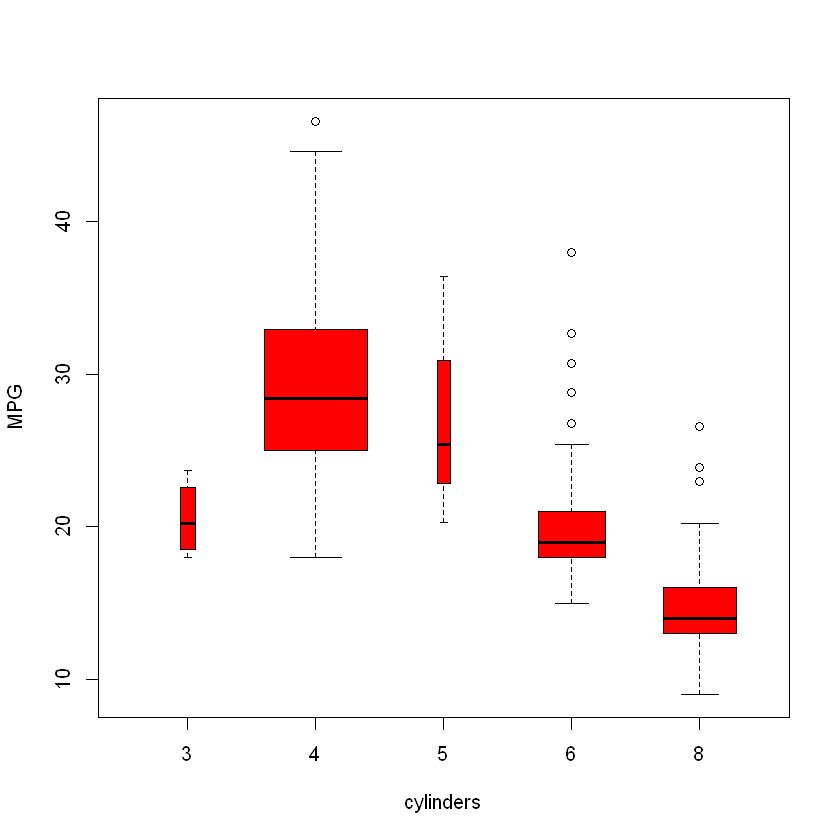

In [52]:
# Turning Cylinders into a qualitative factor
Auto$cylinders = as.factor(Auto$cylinders)
plot(Auto$cylinders, Auto$mpg)
plot(Auto$cylinders, Auto$mpg, col = "red")
plot(Auto$cylinders, Auto$mpg, col = "red", varwidth=T)
plot(Auto$cylinders, Auto$mpg, col = "red", varwidth=T, horizontal=T)
plot(Auto$cylinders, Auto$mpg, col = "red", varwidth=T, xlab = "cylinders", ylab = "MPG")

Histogram:
----

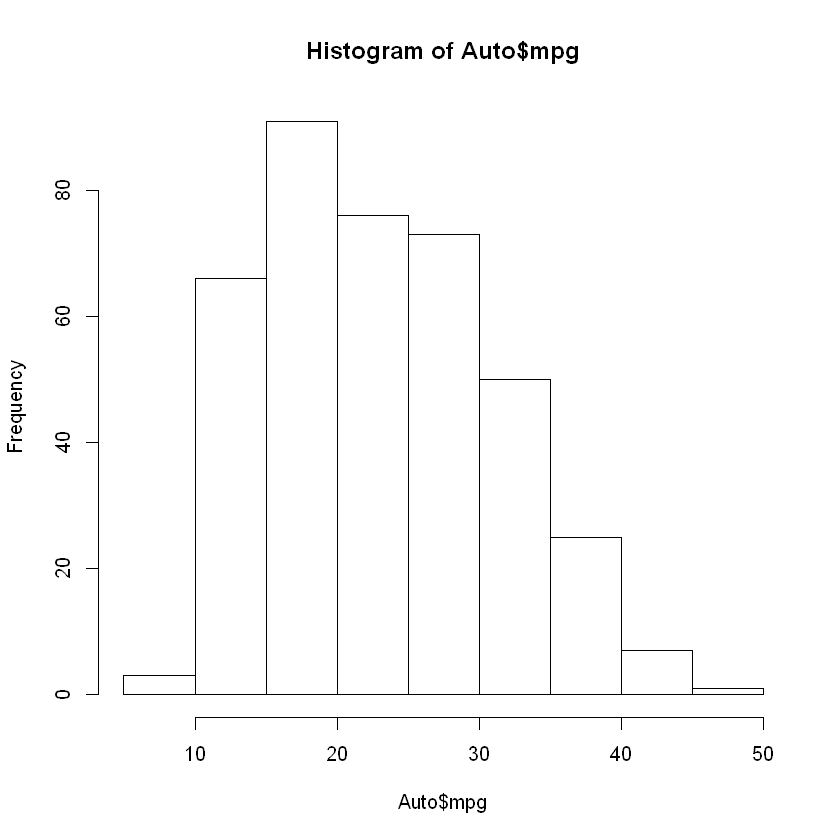

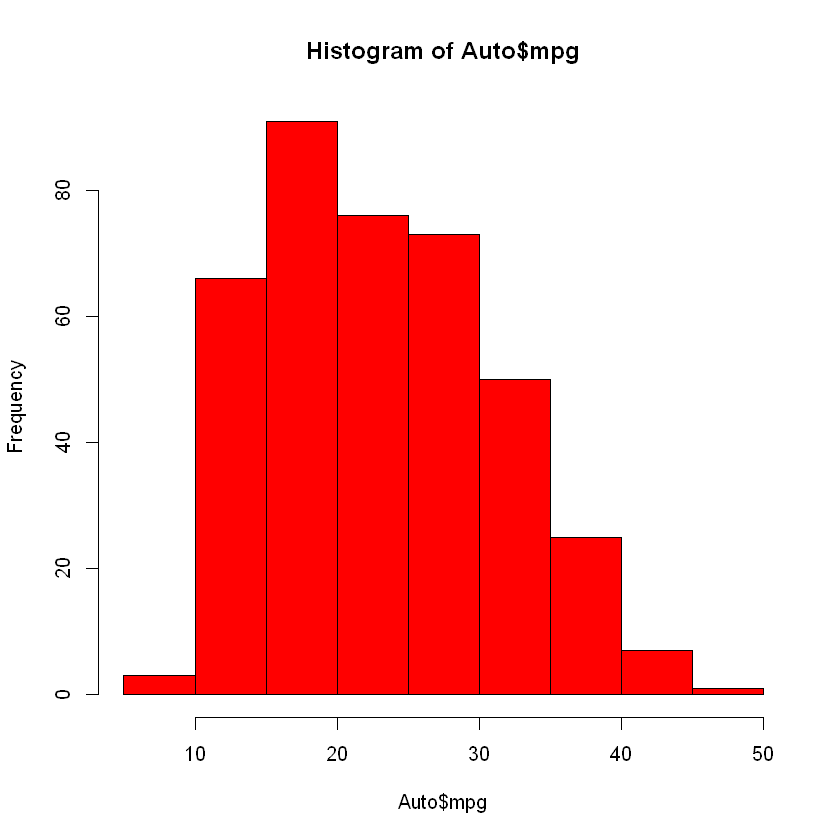

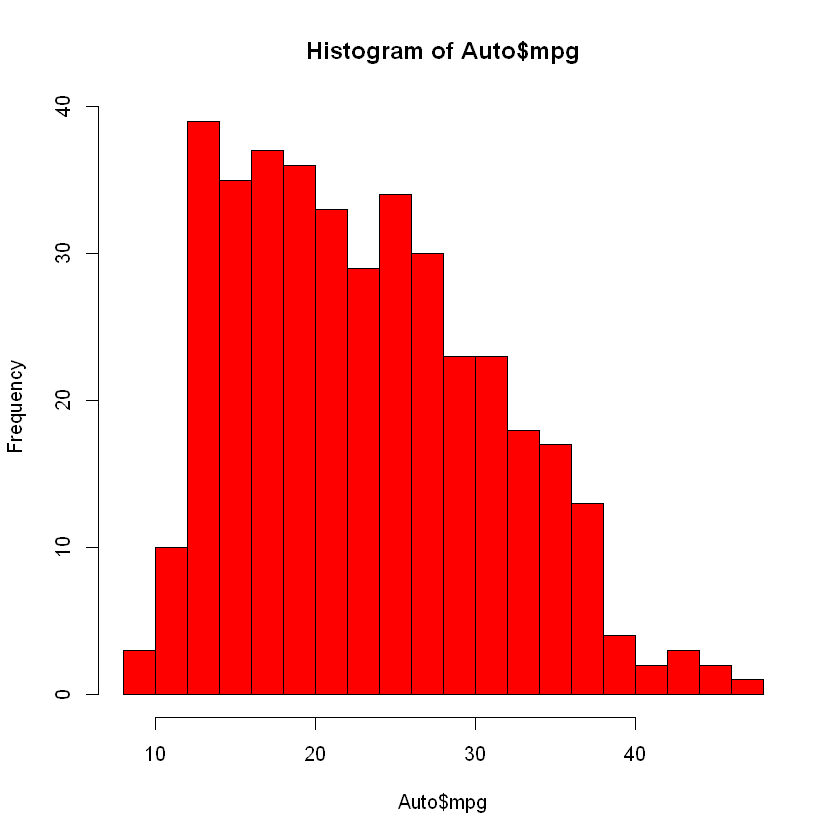

In [55]:
# A histogram of the MPG variable from Auto
hist(Auto$mpg)

# col=2 is synonymous with col="red"
hist(Auto$mpg, col=2)

# breaks=15 is the amount of buckets that the data is placed into
hist(Auto$mpg, col=2, breaks=15)

Scatterplot:
----

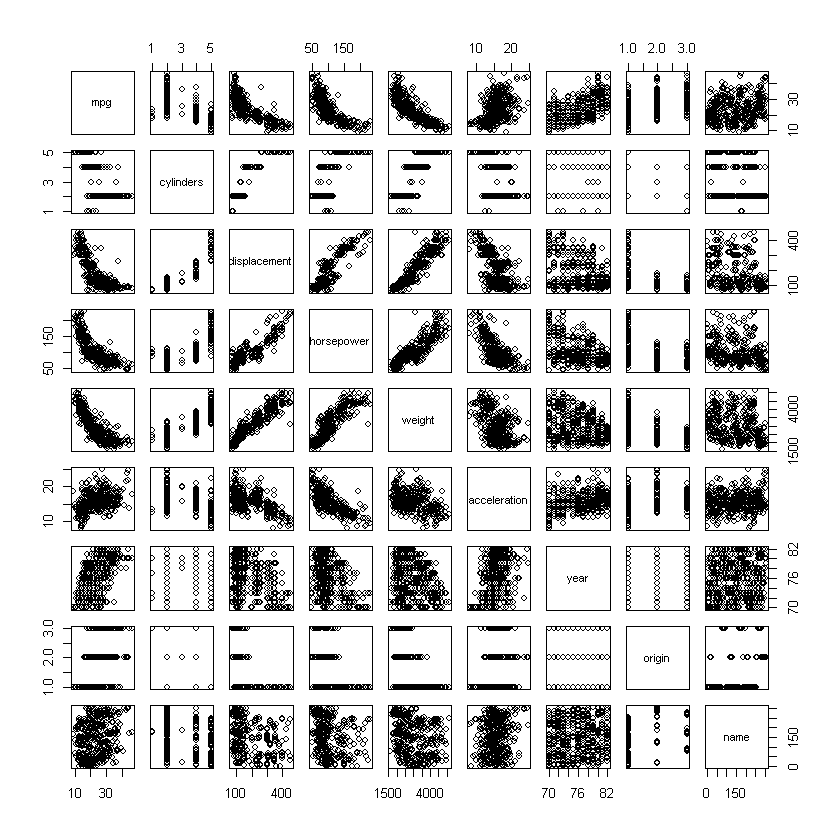

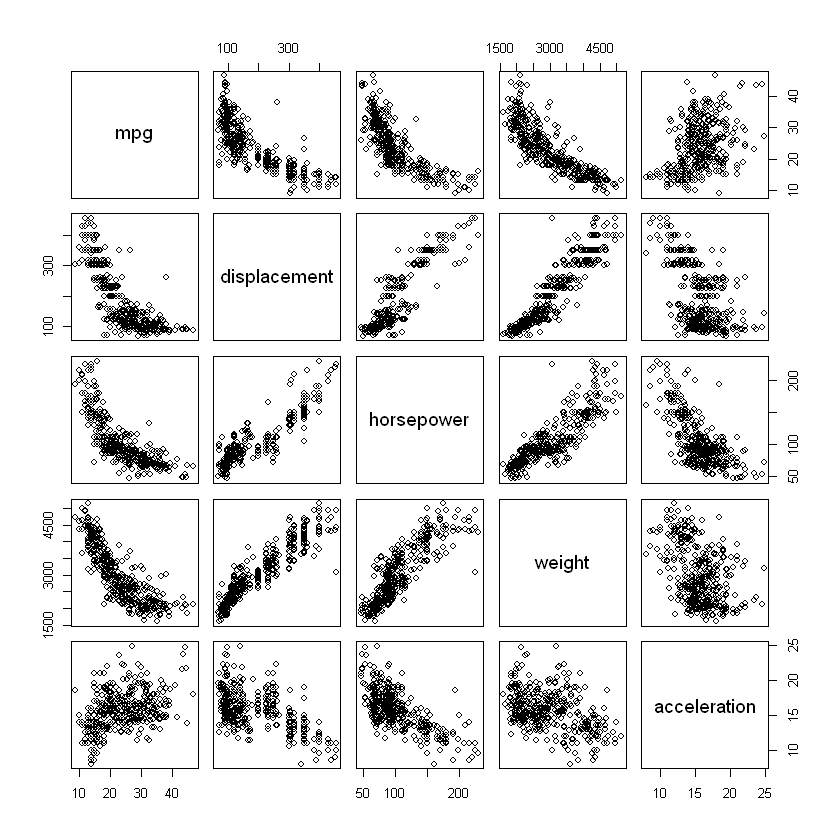

In [56]:
pairs(Auto)
pairs(~ mpg + displacement + horsepower + weight + acceleration, Auto)

integer(0)

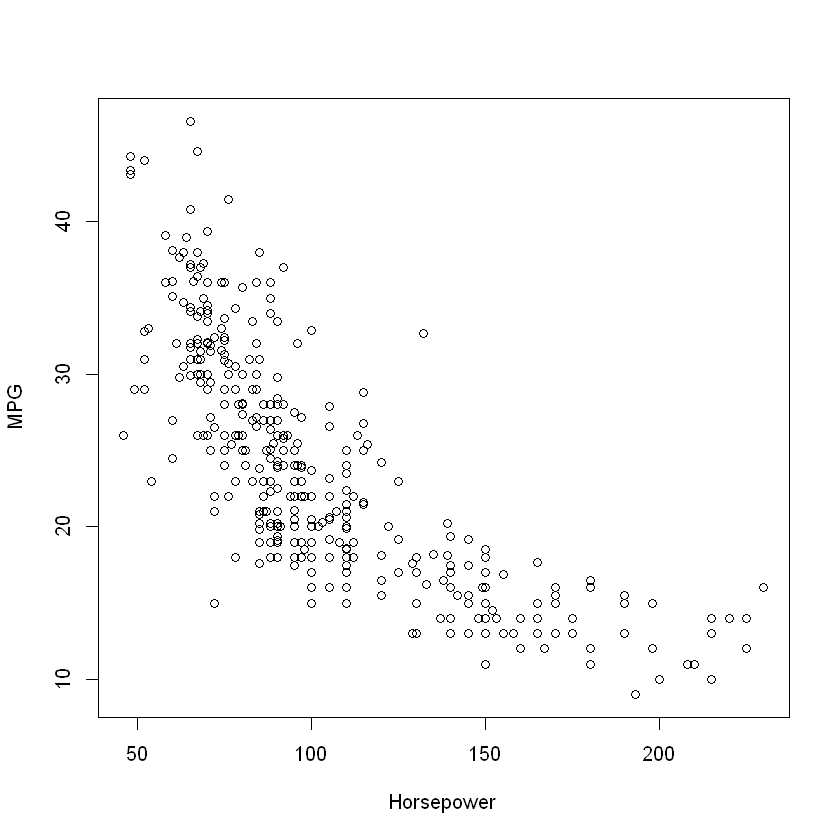

In [63]:
# Plot two variables against eachother
plot(Auto$horsepower, Auto$mpg, xlab = "Horsepower", ylab = "MPG")

# Identify the datapoint/person at a certain level in the data
identify(horsepower, mpg, name)

Summary:
----

In [61]:
# Grabbing a summary of the data
summary(Auto)

      mpg        cylinders  displacement     horsepower        weight    
 Min.   : 9.00   3:  4     Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   4:199     1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   5:  3     Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   6: 83     Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   8:103     3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60             Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                         
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin       :  4  
 3rd Qu.:17.02   3rd Qu.:79.00   3rd Q

In [62]:
# Grabbing a summary of a single variable
summary(mpg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.00   17.00   22.75   23.45   29.00   46.60 